In [578]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

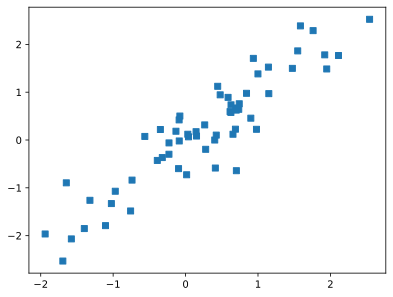

In [579]:
# create data

N = 60
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

# and plot
plt.plot(x,y,'s')
plt.show()

In [593]:
AnnRegression = nn.Sequential(
    nn.Linear(in_features=1,out_features=1),  # input layer
    nn.ReLU(),       # activation function
    nn.Linear(in_features=1,out_features=1)   # output layer
)

AnnRegression

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [594]:
learningRate = 0.06

# LOSS FUNCTION

lossfun = nn.MSELoss()

In [595]:
# optimizer (the flavor of gradient descent to implement)
optimizer = torch.optim.SGD(AnnRegression.parameters(),lr=learningRate)

In [596]:
# STANDARD FORMAT FOR TRAINING DL MODELS

num_epochs = 500
losses = torch.zeros(num_epochs)

## Train the model!
for epoch_i in range(num_epochs):

    yHat = AnnRegression(x)

    loss = lossfun(yHat,y)
    losses[epoch_i] = loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [597]:
predictions = AnnRegression(x)

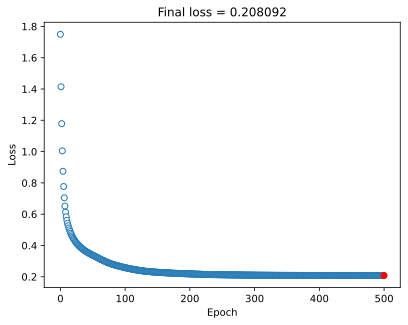

In [598]:
# final loss (MSE)
testloss = (predictions-y).pow(2).mean()

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(num_epochs,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()

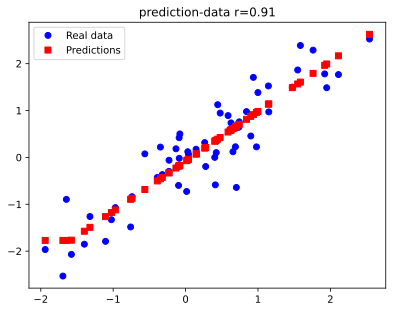

In [599]:
# plot the data
plt.plot(x,y,'bo',label='Real data')
plt.plot(x,predictions.detach(),'rs',label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()